<table>
    <tr><td align="right" style="background-color:#ffffff;">
        <img src="../images/logo.jpg" width="20%" align="right">
    </td></tr>
    <tr><td align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
        Abuzer Yakaryilmaz | June 26, 2019 (updated)<br>
        Özlem Salehi | July 07, 2019 (updated)
    </td></tr>
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<h2>Quantum Tomography</h2>

Suppose we have a quantum state. How can we determine its state with high accuracy?

We have seen that this is possible by quantum teleportation but this protocol has some limitations such as verification of the recevied state.

Given that there are multiple copies of the state, there exist some methods to reconstruct the state.

Now we will see a very simple way of doing this.

You are given 1000 copies of an arbitrary quantum state which lies in the first or second quadrant of the unit circle.

This quantum state can be represented by an angle $ \theta \in [0,180) $.

<i>Please execute the following cell, but do not check the value of $\theta$.</i>

In [11]:
from random import randrange
from math import pi
 
theta = randrange(18000)/18000 * pi

We assume that the quantum state is given to us with the following code. 

    from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

    # we define a quantum circuit with one qubit and one bit
    qreg2 =  QuantumRegister(1) # quantum register with a single qubit
    creg2 = ClassicalRegister(1) # classical register with a single bit
    circuit2 = QuantumCircuit(qreg2,creg2) # quantum circuit with quantum and classical registers

    # rotate the qubit with rotation_angle
    circuit2.ry(2*theta,qreg2[0])

You should write further codes without using variable $theta$ again. You will implement three tasks to approximate $\theta$.

You can use 1000 shots in total when executing your quantum programs. Don't use all at once.

After your guess, please check the actual value and calculate your error in percentage.

<h3> Task 1 </h3>


Recall that any quantum state can be specified by an angle. Collect statistics about $\sin(\theta)$ (or $\cos(\theta)$), to determine the state.

<img src="sincos.png">

In [ ]:
# program 1

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

# we define a quantum circuit with one qubit and one bit
qreg1 =  QuantumRegister(1) # quantum register with a single qubit
creg1 = ClassicalRegister(1) # classical register with a single bit
circuit1 = QuantumCircuit(qreg1,creg1) # quantum circuit with quantum and classical registers

# rotate the qubit with rotation_angle
circuit1.ry(2*theta,qreg1[0]) 

#
# your code is here
#

<a href="B40_Quantum_Tomography.ipynb#task1">click for our solution</a>

<b> Observation: </b>

Remark that $ \sin (\theta) = \sin(\pi - \theta) $. So, we have two candidates: $\theta_1$ or $ \theta_2 = \pi - \theta_1 $.

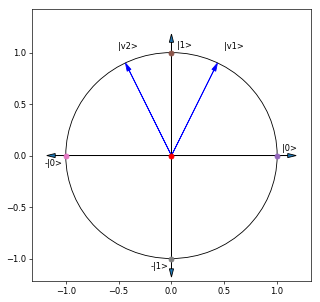

In [7]:
# draw the quantum state

%run qlatvia.py

draw_qubit()

theta2 = pi - theta1

from math import cos,sin

quantum_state1 = [ cos(theta1),sin(theta1) ]
quantum_state2 = [ cos(theta2),sin(theta2) ]

draw_quantum_state(quantum_state1[0],quantum_state1[1],"|v1>")
draw_quantum_state(quantum_state2[0],quantum_state2[1],"|v2>")

How can we distinguish them? 

Consider the following two cases:
<ul>
    <li> rotation with angle $ - \theta_1 $ and </li>
    <li> rotation with angle $ + \theta_1 $. </li>
</ul>

If $ \theta \approx \theta_1 $, then we expect to see more 0s in the first case.

If $ \theta \approx \theta_2 $, then we expect to see more 0s in the second case.

<h3>Task 2</h3>

Determine $\theta$ by considering the two cases (i.r. rotating the states and measuring afterwards for each case).

In [5]:
# program 2

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

# we define a quantum circuit with one qubit and one bit
qreg1 =  QuantumRegister(1) # quantum register with a single qubit
creg1 = ClassicalRegister(1) # classical register with a single bit
circuit1 = QuantumCircuit(qreg1,creg1) # quantum circuit with quantum and classical registers

# rotate the qubit with rotation_angle
circuit1.ry(2*theta,qreg1[0]) 

#
# your code is here
#

NameError: name 'theta' is not defined

<a href="B40_Quantum_Tomography.ipynb#task2">click for our solution</a>

<h3>Task 3</h3>

Make a better approximation of $\theta$ using your remaining shots.

In [ ]:
# program 3

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

# we define a quantum circuit with one qubit and one bit
qreg3 =  QuantumRegister(1) # quantum register with a single qubit
creg3 = ClassicalRegister(1) # classical register with a single bit
circuit3 = QuantumCircuit(qreg3,creg3) # quantum circuit with quantum and classical registers

# rotate the qubit with rotation_angle
circuit3.ry(2*theta,qreg3[0]) 


<a href="B40_Quantum_Tomography.ipynb#task3">click for our solution</a>